# **REGRESSÃO POLINOMIAL**

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
vendas = pd.read_excel('/content/drive/MyDrive/FIAP/Script/comissao.xlsx')

## **ANÁLISE INICIAL**

In [7]:
vendas.head()

,quantidade,comissao
0,1,728
1,2,762
2,3,802
3,4,848
4,5,900


In [8]:
vendas.shape

(50, 2)

In [9]:
vendas.dtypes

quantidade    int64
comissao      int64
dtype: object

In [10]:
vendas = vendas.astype({"comissao": float})

In [11]:
vendas.dtypes

quantidade      int64
comissao      float64
dtype: object

In [12]:
import matplotlib.pyplot as plt

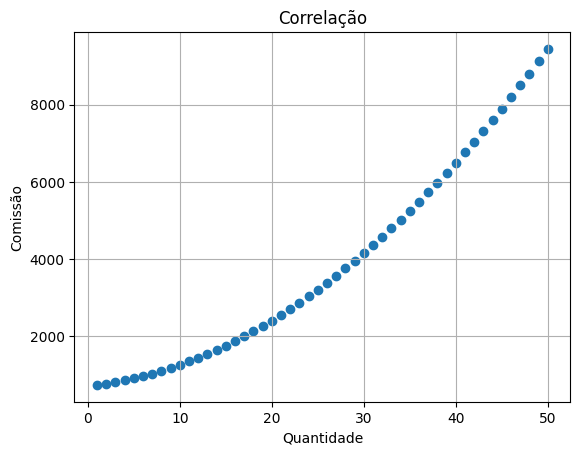

In [13]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.title('Correlação')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(True)
plt.show()

**Regressão Linear**

In [14]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [15]:
# Criação do modelo
regressao = smf.ols('comissao ~ quantidade', data = vendas).fit()

In [16]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           5.98e-34
Time:                        11:36:25   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.0

In [17]:
regressao.params

Intercept    -626.0
quantidade    178.0
dtype: float64

**Equação: Comissão = -626 + 178.quantidade**

**R^2 ajustado = 0,954**

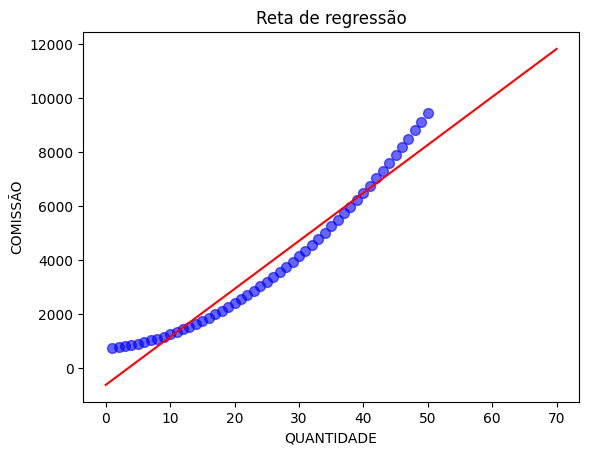

In [18]:
plt.scatter(y=vendas.comissao, x=vendas.quantidade, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 70)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('COMISSÃO')
plt.xlabel('QUANTIDADE')
plt.show()

# **REGRESSÃO POLINOMIAL COM NUMPY - GRAU 2**

**y = b2.x^2 + b1.x + b0**

In [19]:
modelo2 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 2))

In [20]:
y2 = modelo2(vendas.quantidade)
y2

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

In [21]:
modelo2.coef

array([  3.,  25., 700.])

In [22]:
print("Equação: COMISSÃO = {:.1f}*quantidade^2 + {:.1f}*quantidade + {:.1f}".format(modelo2.coef[0], modelo2.coef[1], modelo2.coef[2]))

Equação: COMISSÃO = 3.0*quantidade^2 + 25.0*quantidade + 700.0


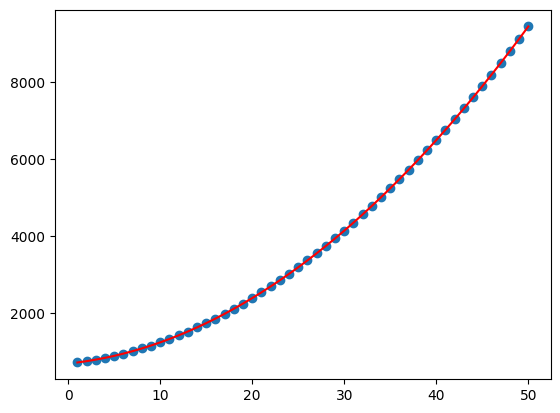

In [23]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade,y2,color='red');


In [ ]:
# Coeficiente de determinação
np.corrcoef(modelo2)**2

# **REGRESSÃO POLINOMIAL COM NUMPY- GRAU 3**

**y = b3.x^3 + b2.x^2 + b1.x + b0**

In [ ]:
modelo3 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 3))

In [ ]:
y3 = modelo3(vendas.quantidade)
y3

In [ ]:
modelo3.coef

In [ ]:
print("Equação: COMISSÃO = {:.1f}*quantidade^3 + {:.1f}*quantidade^2 + {:.1f}*quantidade + {:.1f}".format(modelo3.coef[3], modelo3.coef[2], modelo3.coef[1], modelo3.coef[0]))

In [ ]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade,y3,color='red');

In [ ]:
# Coeficiente de determinação
np.corrcoef(modelo3)**2